In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# List of file paths
file_paths = [
    'D:/Semester 4/Capstone Project/Datasets/DSP Device Daily (History) Jul21-Jul24.xlsx',
    'D:/Semester 4/Capstone Project/Datasets/DSP Device Daily (History) Jun10-May13.xlsx',
    'D:/Semester 4/Capstone Project/Datasets/DSP Device Daily (History) Jun13-May16.xlsx',
    'D:/Semester 4/Capstone Project/Datasets/DSP Device Daily (History) Jun16-May19.xlsx',
    'D:/Semester 4/Capstone Project/Datasets/DSP Device Daily (History) Jun19-Jun21.xlsx'
]

# List to store the DataFrames
dataframes = []

# Loop through each file and load into a DataFrame
for file in file_paths:
    df = pd.read_excel(file)
    dataframes.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dataframes, ignore_index=True)

# Ensure the date column is parsed as a datetime object
# Replace 'Date' with the correct column name for your date field
data['Date'] = pd.to_datetime(data['Date'])

# Sort by the Date column
data = data.sort_values(by='Date')

# Check the merged and sorted data
print(data.head())

# Optionally, save the merged and sorted DataFrame to a new Excel file
# data.to_excel('D:/Semester 4/Capstone Project/Datasets/Merged_Sorted_Data.xlsx', index=False)


      Robot Address       Date  Milk Speed Avg. Milk Duration Time Milking  \
8713            101 2010-10-15              NaN           NaN        00:00   
8714            103 2010-10-15              NaN           NaN        00:01   
14084            12 2014-04-08              NaN           NaN          NaN   
14083           103 2014-04-08              NaN          0:00        00:01   
14082           102 2014-04-08              NaN          0:00        00:00   

       Milk Exp.  Milk Tot.  No. of Feed Visits  
8713         NaN        NaN               701.0  
8714         NaN        NaN               121.0  
14084        NaN        NaN                 2.0  
14083        NaN        0.0                 1.0  
14082        NaN        0.0                 1.0  


In [14]:
data

,Robot Address,Date,Milk Speed Avg.,Milk Duration,Time Milking,Milk Exp.,Milk Tot.,No. of Feed Visits
8713,101,2010-10-15,NaN,NaN,00:00,NaN,NaN,701.0
8714,103,2010-10-15,NaN,NaN,00:01,NaN,NaN,121.0
14084,12,2014-04-08,NaN,NaN,NaN,NaN,NaN,2.0
14083,103,2014-04-08,NaN,0:00,00:01,NaN,0.0,1.0
14082,102,2014-04-08,NaN,0:00,00:00,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...
8716,SUM,NaT,NaN,NaN,NaN,NaN,2498882.9,NaN
14087,AVG,NaT,NaN,NaN,30:08,NaN,1161.1,NaN
14088,SUM,NaT,NaN,NaN,NaN,NaN,3799173.6,NaN
22654,AVG,NaT,NaN,NaN,10:10,NaN,973.7,NaN


In [15]:
# Display the first few rows of the dataframe
print(data.head())

# Display a concise summary of the dataframe
print(data.info())

# Generate descriptive statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


      Robot Address       Date  Milk Speed Avg. Milk Duration Time Milking  \
8713            101 2010-10-15              NaN           NaN        00:00   
8714            103 2010-10-15              NaN           NaN        00:01   
14084            12 2014-04-08              NaN           NaN          NaN   
14083           103 2014-04-08              NaN          0:00        00:01   
14082           102 2014-04-08              NaN          0:00        00:00   

       Milk Exp.  Milk Tot.  No. of Feed Visits  
8713         NaN        NaN               701.0  
8714         NaN        NaN               121.0  
14084        NaN        NaN                 2.0  
14083        NaN        0.0                 1.0  
14082        NaN        0.0                 1.0  
<class 'pandas.core.frame.DataFrame'>
Index: 28728 entries, 8713 to 22655
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Robot Ad

In [16]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Display columns with more than 50% missing values
print(missing_percentage[missing_percentage > 50])

Milk Speed Avg.    61.121554
Milk Duration      61.121554
Time Milking       61.086745
Milk Exp.          61.121554
Milk Tot.          61.076302
dtype: float64


In [17]:
# List of columns with more than 60% null values
columns_to_drop_nulls = ['Milk Speed Avg.', 'Milk Duration', 'Time Milking', 'Milk Exp.', 'Milk Tot.']

# Drop rows where any of these columns have null values
df_cleaned = data.dropna(subset=columns_to_drop_nulls)

In [18]:
data = df_cleaned

In [19]:
# Impute missing values for 'Lactation days' with the median, using .loc to ensure we are modifying the DataFrame
# median_lactation_days = data['Lactation Days'].median()
# data['Lactation Days'] = data['Lactation Days'].fillna(median_lactation_days)

In [20]:
print(data.isnull().sum())

data

Robot Address         0
Date                  0
Milk Speed Avg.       0
Milk Duration         0
Time Milking          0
Milk Exp.             0
Milk Tot.             0
No. of Feed Visits    0
dtype: int64


,Robot Address,Date,Milk Speed Avg.,Milk Duration,Time Milking,Milk Exp.,Milk Tot.,No. of Feed Visits
14076,103,2014-04-09,2.0,3:28,04:10,8.0,176.0,32.0
14075,102,2014-04-09,1.7,3:40,03:45,0.0,187.4,33.0
14074,101,2014-04-09,1.7,4:21,04:17,6.0,196.4,33.0
14070,101,2014-04-10,2.3,2:46,03:09,181.0,227.2,41.0
14072,103,2014-04-10,2.3,2:38,03:06,174.0,215.2,40.0
...,...,...,...,...,...,...,...,...
1387,102,2024-06-29,3.0,4:19,09:54,903.0,976.5,129.0
278,103,2024-06-29,3.3,3:38,03:55,341.0,396.1,65.0
1143,103,2024-06-30,3.1,4:15,07:59,777.0,827.6,87.0
2162,102,2024-06-30,2.9,4:23,08:06,766.0,782.9,95.0


In [21]:
# import pandas as pd

# # Detect outliers using IQR for the 'Milk Speed Avg.' column
# Q1 = data['Milk Speed Avg.'].quantile(0.25)
# Q3 = data['Milk Speed Avg.'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
# outliers = data[(data['Milk Speed Avg.'] < (Q1 - 1.5 * IQR)) | (data['Milk Speed Avg.'] > (Q3 + 1.5 * IQR))]

# # Remove outliers from the 'Milk Speed Avg.' column
# data = data[~((data['Milk Speed Avg.'] < (Q1 - 1.5 * IQR)) | (data['Milk Speed Avg.'] > (Q3 + 1.5 * IQR)))]

In [22]:
data

,Robot Address,Date,Milk Speed Avg.,Milk Duration,Time Milking,Milk Exp.,Milk Tot.,No. of Feed Visits
14076,103,2014-04-09,2.0,3:28,04:10,8.0,176.0,32.0
14075,102,2014-04-09,1.7,3:40,03:45,0.0,187.4,33.0
14074,101,2014-04-09,1.7,4:21,04:17,6.0,196.4,33.0
14070,101,2014-04-10,2.3,2:46,03:09,181.0,227.2,41.0
14072,103,2014-04-10,2.3,2:38,03:06,174.0,215.2,40.0
...,...,...,...,...,...,...,...,...
1387,102,2024-06-29,3.0,4:19,09:54,903.0,976.5,129.0
278,103,2024-06-29,3.3,3:38,03:55,341.0,396.1,65.0
1143,103,2024-06-30,3.1,4:15,07:59,777.0,827.6,87.0
2162,102,2024-06-30,2.9,4:23,08:06,766.0,782.9,95.0


C:\Users\asus\AppData\Local\Temp\ipykernel_10520\323104177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Milk Duration'] = data['Milk Duration'].apply(convert_to_seconds)


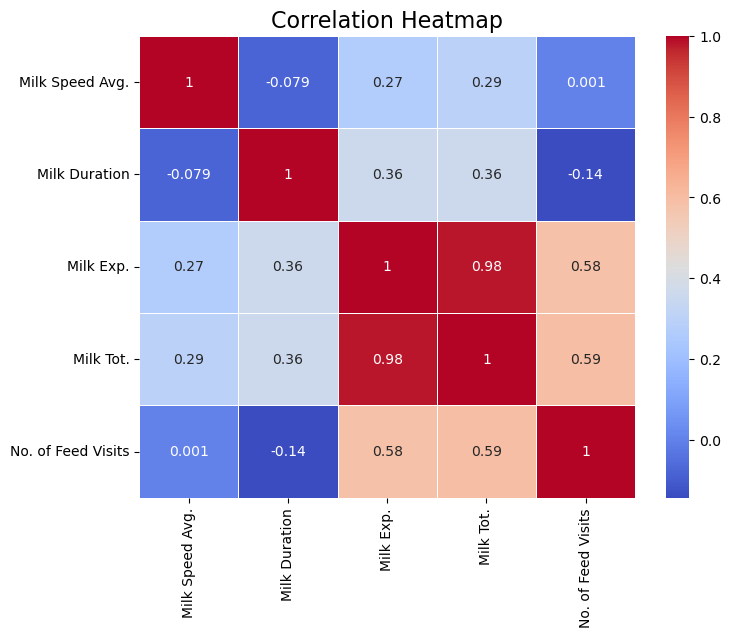

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Milk Duration' from mm:ss to total seconds
def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

data['Milk Duration'] = data['Milk Duration'].apply(convert_to_seconds)

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap with annotations and a color palette
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is in a DataFrame called `data`
# Example columns: 'Date', 'Milk Speed Avg.', 'Milk Duration', 'Time Milking', 'Milk Exp.', 'Milk Tot.'

# Select features and target
X = data.drop(['Date', 'Milk Tot.', 'Milk Exp.', 'Time Milking'], axis=1)  # Features (drop 'Date' and 'Milk Tot.' if it’s the target)
y = data['Milk Tot.']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")


RMSE: 205.73991740117634
R-squared: 0.6854123037181594


C:\Users\asus\anaconda3\envs\spanalytics\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared: {cv_scores.mean()}")
print(f"Standard Deviation of R-squared: {cv_scores.std()}")

Cross-Validation R-squared Scores: [0.73016082 0.59468372 0.41705988 0.57575361 0.53618514]
Mean R-squared: 0.5707686339128676
Standard Deviation of R-squared: 0.10082167376411831


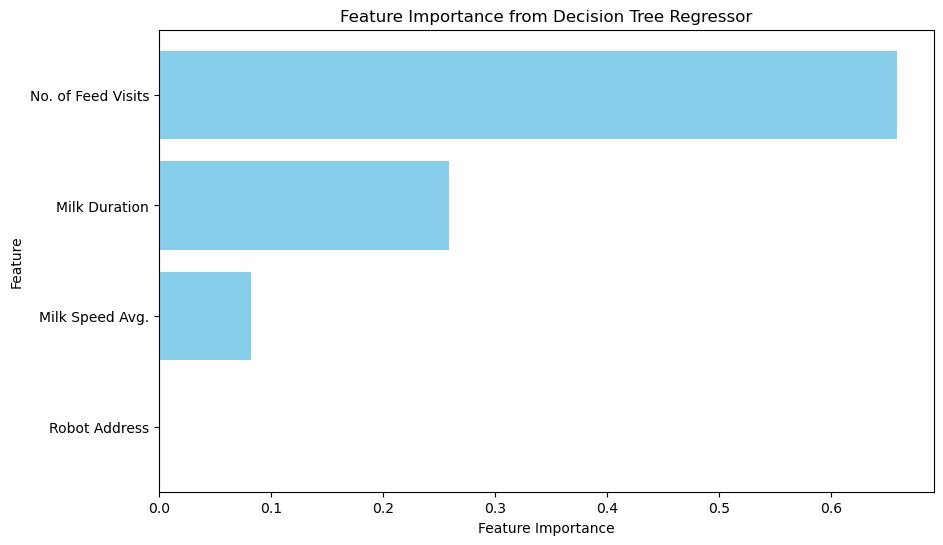

In [26]:
import matplotlib.pyplot as plt

# Get feature importances from the Decision Tree model
importances = tree_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data with multiple predictors
# Replace 'Predictor1', 'Predictor2', 'Predictor3' with the actual column names from your dataset
X = data[['No. of Feed Visits', 'Milk Duration']]  # Multiple predictors
y = data['Milk Tot.']    # Response

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


RMSE: 250.67365115946694
R^2: 0.5329945118926342


C:\Users\asus\anaconda3\envs\spanalytics\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
